In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

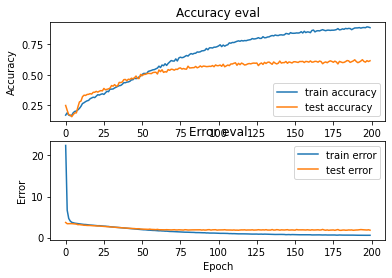

In [6]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each porcessed segment
DATASET_PATH = "/content/drive/MyDrive/DL_for_Audio/data/json/data.json"  

def load_data(dataset_path):
  """Loads training dataset from json file.

      :param data_path (str) : path to json file containing data
      :return X (ndarray) : Inputs
      :return Y (ndarray) : Targets
  """
  
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  # convert lists into numpy arrays
  X = np.array(data["mfcc"])          # mfcc, labels 값이 list이므로 -> numpy array로 변경
  y = np.array(data["labels"])       

  return X, y


def plot_history(history):
  
  fig, axs = plt.subplots(2)

  # create accuracy sublpot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")
  # create error sublpot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"], label="test error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")
  plt.show()


if __name__ == "__main__" :

  # load data
  X, y = load_data(DATASET_PATH)

  # split the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  
  # build the network architecture
  model = keras.Sequential([
                            
      # input layer
      keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),  # data를 1차원으로 flatten

      # 1st dense layer
      keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),  

      # 2nd dense layer
      keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      # 3rd dense layer
      keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      # output layer
      keras.layers.Dense(10, activation="softmax")
  ])

  # compile model(network)
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  
  model.summary()

  # train model
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200)

  # plot accuracy and error over the epochs
  plot_history(history)

In [12]:
def plot_history(history):
  
  fig, axs = plt.subplots(2)

  # create accuracy sublpot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")
  # create error sublpot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"], label="test error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")
  axs[1].set_ylim(0,5)
  plt.show()

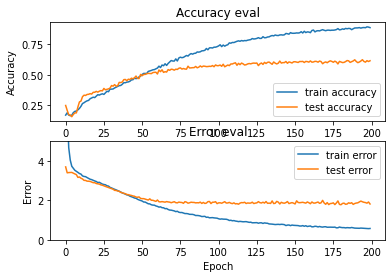

In [13]:
plot_history(history)